In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src import visualization as vis

pd.set_option('display.max_columns', None)


In [80]:
df = pd.read_csv('files/data-hotel.csv', index_col=0)

In [81]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,courtesy,arrival_date
0,Resort Hotel,False,342,27,0,0,2,0,0,BB,Portugal,Undefined,Direct,False,0,0,C,C,3,Undefined,0,Transient,0.0,0,0,Check-Out,2015-07-01,True,2015-7-1
1,Resort Hotel,False,737,27,0,0,2,0,0,BB,Undefined,Undefined,Direct,False,0,0,Undefined,C,4,Undefined,0,Transient,0.0,0,0,Check-Out,2015-07-01,True,2015-7-1
2,Resort Hotel,False,7,27,0,1,1,0,0,BB,United Kingdom,Undefined,Direct,False,0,0,A,C,0,Undefined,0,Transient,75.0,0,0,Check-Out,2015-07-02,False,2015-7-1
3,Resort Hotel,False,13,27,0,1,1,0,0,BB,United Kingdom,Corporate,Corporate,False,0,0,A,A,0,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,False,2015-7-1
4,Resort Hotel,False,14,28,0,2,2,0,0,BB,Undefined,Online TA,TA/TO,False,0,0,A,A,0,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,False,2015-7-1


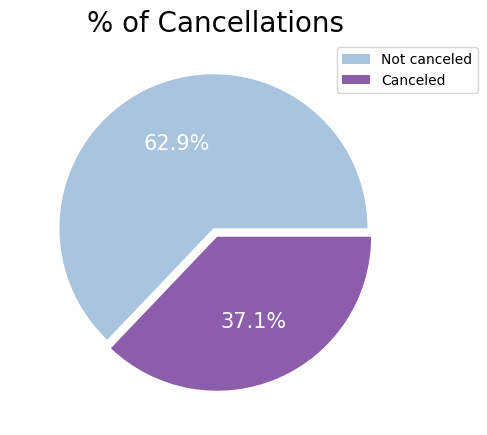

In [82]:
vis.pie(df['is_canceled'].value_counts(), ['Not canceled', 'Canceled'], 15, 'white', df, 'BuPu', '% of Cancellations', 'Black', 20, 0.03, (5,5))

El porcentaje de cancelaciones es de **37,1%**, un número que podría considerarse relativamente alto. Para conocer el motivo tras ese resultado, primero realizaremos un análisis general de los datos y en base al mismo iremos profundizando en distintas variables.

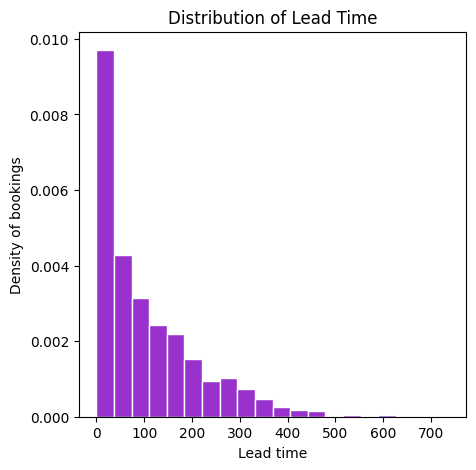

In [83]:
vis.hist('lead_time', df, 'darkorchid', 'white', True, 20, 'Lead time' , 'Density of bookings', 'Distribution of Lead Time', (5,5))

Observamos que **la mayoría de reservas a los hoteles se realizan con una antelación de no más de 50 días**. Conforme el plazo entre la reserva y la llegada aumenta, el número de reservas disminuye considerablemente.

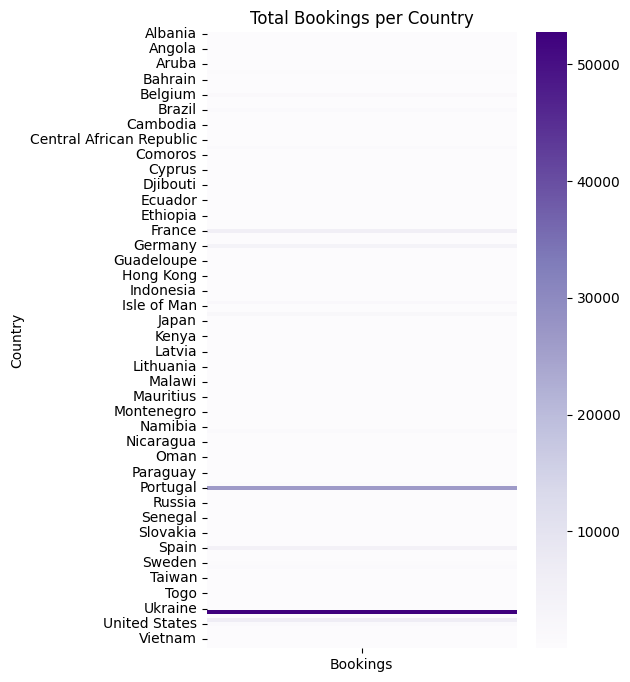

In [84]:
# Crea un DataFrame que contenga el número de reservas por país
heatmap_data = df['country'].value_counts().reset_index()
heatmap_data.columns = ['Country', 'Bookings']

# Crea el heatmap
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(heatmap_data.pivot_table(index='Country', values='Bookings', aggfunc='sum'), cmap="Purples", annot=False, fmt='d')
heatmap.set_title('Total Bookings per Country')
heatmap.set_xlabel('')
heatmap.set_ylabel('Country');

**La mayoría de reservas provienen de Ucrania y Portugal**. A ambos países les siguen, de lejos, Francia, España, Alemania, Estados Unidos y Japón (todos ellos con menos de 2500 reservas).

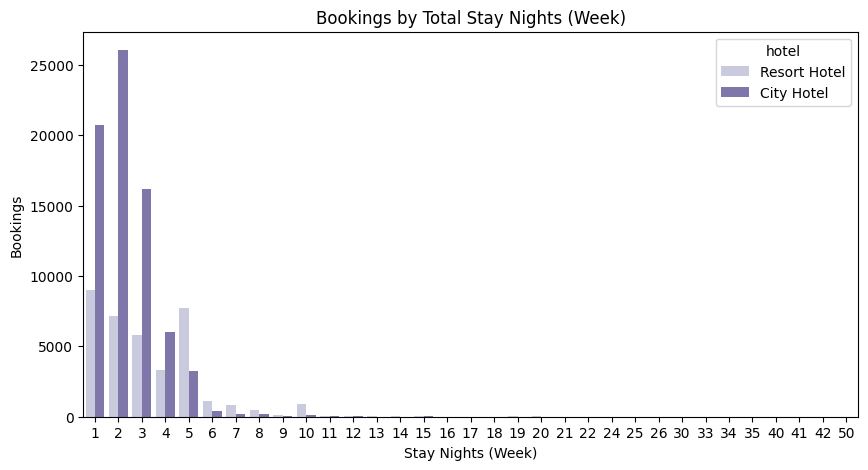

In [91]:
df_filtered1 = df[df['stays_in_week_nights'] != 0]

vis.countplot('stays_in_week_nights', df_filtered1, 'Purples', 'hotel', True, None, 'Stay Nights (Week)', 'Bookings', 'Bookings by Total Stay Nights (Week)', 0, (10,5))

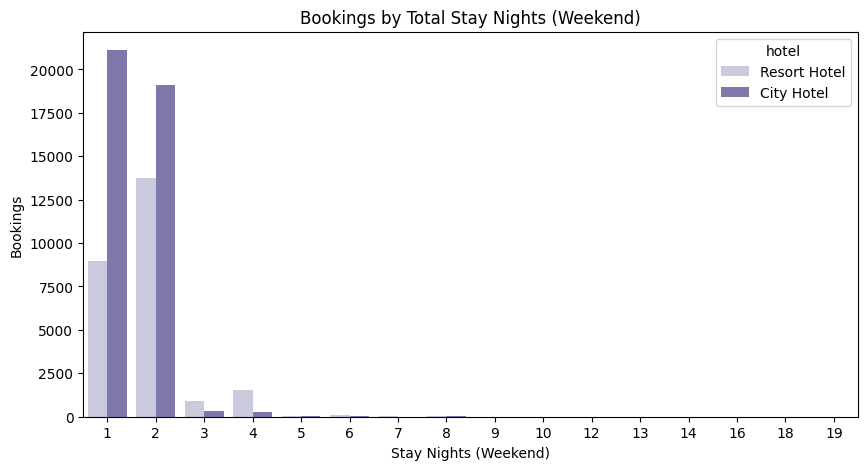

In [92]:
df_filtered2 = df[df['stays_in_weekend_nights'] != 0]

vis.countplot('stays_in_weekend_nights', df_filtered2, 'Purples', 'hotel', True, None, 'Stay Nights (Weekend)', 'Bookings', 'Bookings by Total Stay Nights (Weekend)', 0, (10,5))

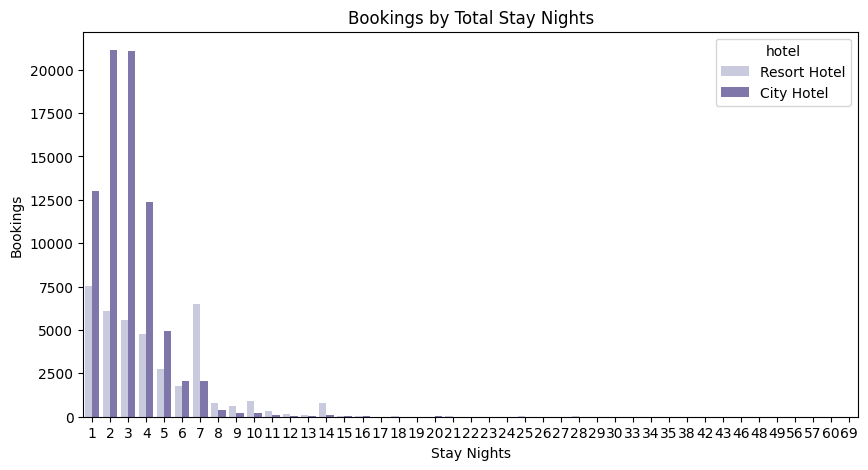

In [90]:
df_copy = df.copy()

df_copy['total_stay_nights'] = df_copy['stays_in_weekend_nights'] + df['stays_in_week_nights']

df_filtered3 = df_copy[df_copy['total_stay_nights'] != 0]

vis.countplot('total_stay_nights', df_filtered3, 'Purples', 'hotel', True, None, 'Stay Nights', 'Bookings', 'Bookings by Total Stay Nights', 0, (10,5))

En total los clientes suelen reservar entre 1 y 4 noches en los hoteles.